# Clustering Exercise  
  
In the `clustering.ipynb` notebook, you were given a demonstration of how dimensionality reduction and clustering can be used to do exploratory analysis of data. In this exercise, you will be carrying out this analysis yourself on a dataset that we have synthetically generated.  
  
You are going to be given measurements for 300 patients. There are a number of patient subtypes in the data. Your task is to identify these subtypes and clinically interpret what they may correspond to.  
  
You can use the skills and code from the `clustering.ipynb` notebook to help you with this exercise. If you have any questions, put your hand up and a course instructor will come over to help you.

## Method  
  
Follow these steps to identify the clusters 
- Use `pandas` to read in the `synthetic_clusters.csv` dataset. This has a number of observations for 300 patients. 
- Use UMAP to project this high dimensional dataset to 2 dimensions instead for visualisation. Make sure to record the `n_neighbors` and `min_dist` that you use to do this. 
- On the original data, perform K-Means or hierarchical clustering (your choice). Vary the number of clusters to identify a suitable number of clusters
- Use the UMAP projection to visualise how these different numbers of clusters appear in the projected space. What seems to be the correct number of clusters?
  
It is beyond the scope of this exercise, but the next stage would be to interpret what these clusters correspond to clinically!

We have got you started below

In [11]:
# Installing the UMAP library to make sure we can use it

src_dir = "../src"
import sys
sys.path.append(src_dir)

from install_if_missing import install_if_missing

install_if_missing("umap-learn==0.5.1", verbose=True)
install_if_missing("seaborn", verbose=True)

Installing 'umap-learn==0.5.1'...
'seaborn' is already installed.


In [12]:
# Importing any libraries that we need to solve the problem

import pandas as pd 
import numpy as np 

import umap.umap_ as umap
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans

from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

In [13]:
df_raw = pd.read_csv("dataset/synthetic_clusters.csv")

In [14]:
from sklearn.preprocessing import StandardScaler

# standardising our dataset

scaler = StandardScaler()
df = scaler.fit_transform(df_raw)

In [15]:
# The first step is to use UMAP to project the data into 2D

# Apply UMAP
reducer = umap.UMAP(random_state=42, min_dist = 0.1, n_neighbors = 10)
X_umap = reducer.fit_transform(df)

# Store UMAP results in a DataFrame
df_umap = pd.DataFrame(X_umap, columns=["UMAP1", "UMAP2"])


### KMeans Clustering 
  
First, let's try K-Means clustering with 2 clusters!

In [16]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)

# We save the K-Means clustering result to the dataframe so that we can plot it later
df_umap["KMeans_Cluster"] = kmeans.fit_predict(df)

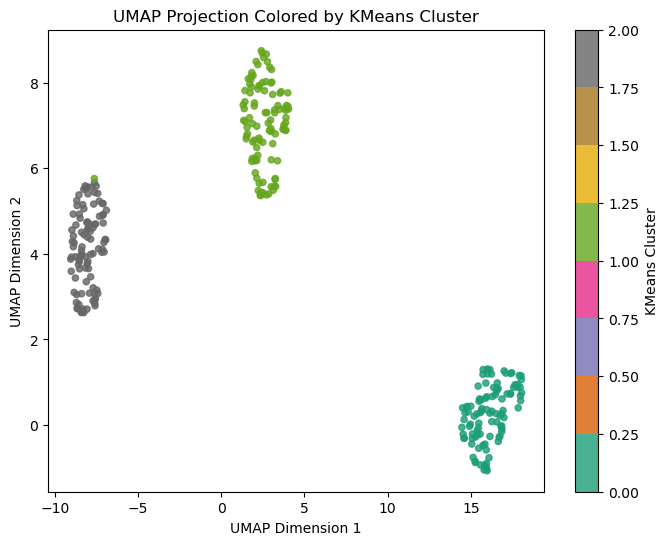

In [17]:
# Plot UMAP + K-Means Clusters
# 
plt.figure(figsize=(8, 6))
scatter = plt.scatter(
    X_umap[:, 0], # The UMAP x direction
    X_umap[:, 1], # The UMAP y direction 
    c=df_umap["KMeans_Cluster"], # what colour we want to plot things in: here the KMeans_Clusters should all be coloured the same thing
    cmap='Dark2',   # good for binary values
    s=20,
    alpha=0.8
)

plt.title("UMAP Projection Colored by KMeans Cluster")
plt.xlabel("UMAP Dimension 1")
plt.ylabel("UMAP Dimension 2")
plt.colorbar(scatter, label='KMeans Cluster')
plt.show()


Based on the UMAP plot, it seems that 3 clusters might be more appropriate! 

### Now let's try hierarchical clustering

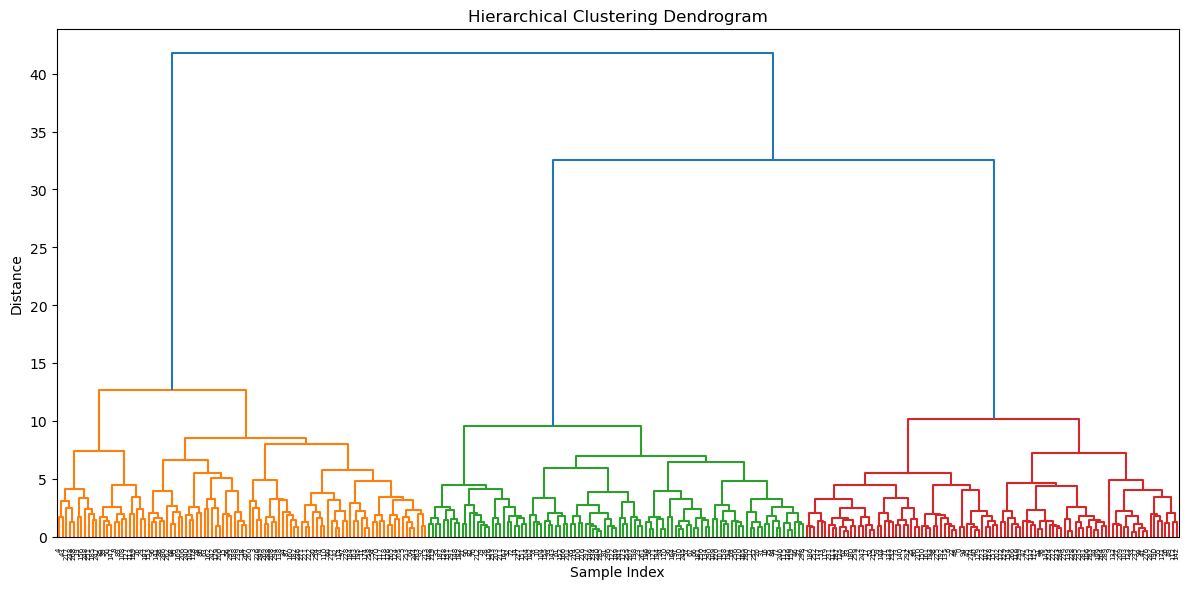

In [18]:
# Perform hierarchical clustering
# 'ward' minimizes the variance within clusters
Z = linkage(df, method='ward')

# Plot the dendrogram
plt.figure(figsize=(12, 6))
dendrogram(Z, labels=df_raw.index.tolist(), leaf_rotation=90)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Sample Index")
plt.ylabel("Distance")
plt.tight_layout()
plt.show()


From the clustering dendrogram, it seems like three is the appropriate number of clusters, so we will use 3 clusters

In [19]:
n_clusters = 3
cluster_labels = fcluster(Z, n_clusters, criterion='maxclust')

# Step 4: Add cluster labels to the dataframe
df_umap['hierarchical_cluster'] = cluster_labels

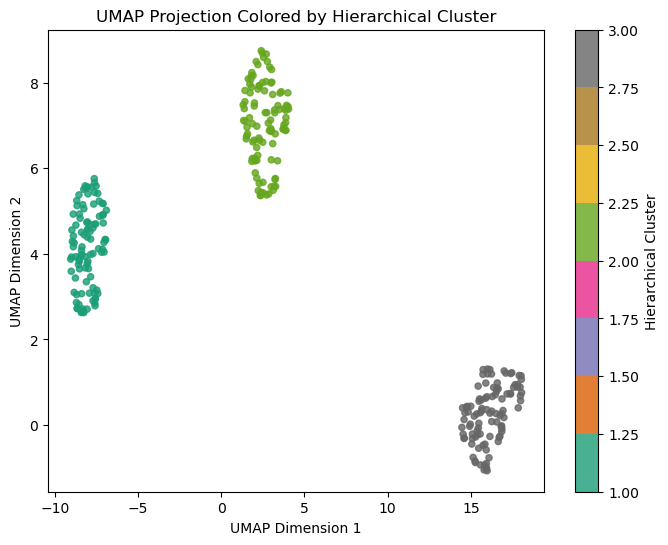

In [20]:
# Plot UMAP + Hierarchical Clusters
# 
plt.figure(figsize=(8, 6))
scatter = plt.scatter(
    X_umap[:, 0],
    X_umap[:, 1],
    c=df_umap["hierarchical_cluster"],
    cmap='Dark2',   # good for binary values
    s=20,
    alpha=0.8
)

plt.title("UMAP Projection Colored by Hierarchical Cluster")
plt.xlabel("UMAP Dimension 1")
plt.ylabel("UMAP Dimension 2")
plt.colorbar(scatter, label='Hierarchical Cluster')
plt.show()
